In [14]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from visualizations import bias_variance_demo, cross_validation_demo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [15]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../Data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [ ]:
tX.shape

In [ ]:
from ml_functions import split_data

# first column is y, second onwards is tX
split_data(tX, y, 0.05, seed=1)[1].shape

### removing -999s

In [16]:
for col in tX.T:
    med = np.median(col[col != -999])
    col[col == -999] = med

### removing 22nd Index

In [17]:
model_index = tX[:, 22]

#remove model index column from tx
tX = np.delete(tX, 22, 1)

In [20]:
model_index.shape

(250000,)

### Build 4 tX and y

In [21]:
Fused = np.c_[y, tX] # combining y and tX such that it is not lost

Fused_0 = Fused[model_index == 0.0] # only a subset of the model... 
Fused_1 = Fused[model_index == 1.0]
Fused_2 = Fused[model_index == 2.0]
Fused_3 = Fused[model_index == 3.0]

In [22]:
Fused_0.shape

(99913, 30)

## Build list of polynomials

In [87]:
# building a polynomial matrix of degree 10
tX_10 = build_poly3(tX,10)

In [ ]:
import pickle
pickle.dump( tX_10, open( "tX_10.p", "wb" ) )

In [ ]:
tX_10 = pickle.load( open( "tX_10.p", "rb" ) )

In [89]:
tX_10.shape

(250000, 290)

In [119]:
Fused = np.c_[y, tX_10]

In [ ]:
tX_list = list()
# takes a long time to run, run only once!!!
for d in range(1,11):
    tX_list.append(build_poly3(tX,d))

In [113]:
def build_poly_d(tX_all_degree, degree):
    index = list()
    for i in range(0,29): # tX.shape[1] is 29, 
        for d in range(1,degree+1): # up to degree 10 for example
            index.append(i*10+d) # [1,11,...,281]
    return tX_all_degree[:,index]

In [120]:
max_degree = 10
tX_list = list()
# takes a long time to run, run only once!!!
for degree in range(1,max_degree):
    tX_list.append(build_poly_d(Fused, degree))
    print(degree)

1
2
3
4
5
6
7
8
9


In [122]:
tX_list[8].shape

(250000, 261)

In [123]:
tX_list[8]

array([[  1.38470000e+02,   1.91739409e+04,   2.65501560e+06, ...,
          2.42599932e+14,   2.75343645e+16,   3.12506777e+18],
       [  1.60937000e+02,   2.59007180e+04,   4.16838385e+06, ...,
          4.51028728e+11,   2.08492540e+13,   9.63777614e+14],
       [  1.12406000e+02,   1.26351088e+04,   1.42026204e+06, ...,
          3.32247427e+11,   1.47022809e+13,   6.50590632e+14],
       ..., 
       [  1.05457000e+02,   1.11211788e+04,   1.17280616e+06, ...,
          2.30232123e+11,   9.66790731e+12,   4.05974764e+14],
       [  9.49510000e+01,   9.01569240e+03,   8.56049009e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.12406000e+02,   1.26351088e+04,   1.42026204e+06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [104]:
build_poly_d(tX_10,2).shape

[1, 2, 11, 12, 21, 22, 31, 32, 41, 42, 51, 52, 61, 62, 71, 72, 81, 82, 91, 92, 101, 102, 111, 112, 121, 122, 131, 132, 141, 142, 151, 152, 161, 162, 171, 172, 181, 182, 191, 192, 201, 202, 211, 212, 221, 222, 231, 232, 241, 242, 251, 252, 261, 262, 271, 272, 281, 282]


(250000, 58)

In [ ]:
Fused = np.c_[y, tX_10]

### Building Polynomail Matrix

In [5]:
# x is one column
def build_poly_one_column(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    size = (x.shape[0])*(degree)
    phi = list()
    
    for i in range(0, x.shape[0]):
        for j in range(1, degree+1):
            index = j + i*(degree+1)
            phi.append(np.power(x[i], j))
            
    return np.array(phi).reshape((1, size))

In [6]:
#polyX = np.full((tX.shape[0], tX.shape[1] * (degree+1)), 0.0)
# tX is a multidimensional array
def build_poly3(tX, degree):
    polyX = list()
    for row in tX:
        polyX.append(build_poly_one_column(row, degree))

    PolyXNP = np.array(polyX)
    PolyXNP2 = PolyXNP.reshape((PolyXNP.shape[0], PolyXNP.shape[2]))

    return PolyXNP2
    #Standardize
    PolyXNP2 = standardize(PolyXNP2)
    

In [8]:
# building polynomial
degree = 2
# tX = build_poly3(tX,2)

In [9]:
# standardize such that the mean is 0 and standard deviation is 1.
# X is a multi-dimensional array
def standardize(X):
    X = (X - np.mean(X)) / np.std(X)
    X = np.hstack((np.ones((X.shape[0],1)), X)) # adding column of ones for the first column
    return X

## Cross Validation

In [ ]:
x_test = x0[k_indices[10],:]

In [77]:
def cross_validation_rr(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # empty array for computing the mean for each hold
    loss_tr_arr = [] 
    loss_te_arr = [] 
    
    for k in range(0,k):
        # get k'th subgroup in test, others in train
        x_test = x[k_indices[k],:]
        y_test = y[k_indices[k]]
        x_train = np.delete(x, k_indices[k], axis=0)
        y_train = np.delete(y, k_indices[k])

        print(x_train.shape,x_test.shape)
        
        

        # ridge regression
        loss_tr, weights = ridge_regression(y_train, tx_train, lambda_)
        loss_te = compute_loss(y_test,tx_test,weights)
        loss_tr_arr.append(loss_tr)
        loss_te_arr.append(loss_te)
        
    # calculate the loss for train and test data
    loss_tr = np.mean(loss_tr_arr)
    loss_te = np.mean(loss_te_arr)
    
    return loss_tr, loss_te

In [85]:
from plots import cross_validation_visualization
def cross_validation_demo(x, y, k_fold, degree):
    """Generating the cv visualization for one example."""
    seed = 1
    lambdas = np.logspace(-4, 0, 1)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    

    # cross validation: TODO
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation_rr(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [79]:
tX[ki[3]].shape

(24978, 29)

(74935, 29) (24978, 29)
273.667471292
53.9548204017
(74935, 29) (24978, 29)
273.665784016
83.4353411521
(74935, 29) (24978, 29)
273.665775918
50.0616024828
(74935, 29) (24978, 29)
89.8163713125
158.027455211


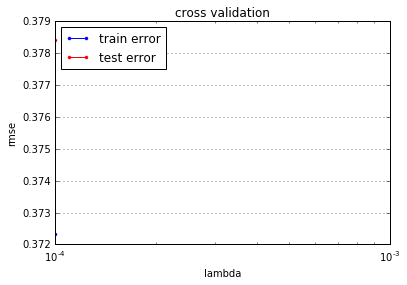

In [86]:
cross_validation_demo(x0,y0,4,2)

## Build a List of Polynomials

In [63]:
ki = build_k_indices(y0, 4, 5)
tX[ki[3],:].shape

(24978, 29)

In [64]:
tX_copy = tX.copy()

In [65]:
tX.shape

(250000, 29)

In [66]:
np.delete(tX_copy, ki[3], axis=0).shape

(225022, 29)

In [35]:
lambdas = np.logspace(-4, 0, 30)

In [36]:
lambdas.shape

(30,)

In [81]:
y0 = Fused_0[:,0]
x0 = Fused_0[:,1:Fused_0.shape[1]]
y0.shape

(99913,)